<a href="https://colab.research.google.com/github/mamuncseru/deep_understanding_deep_learning/blob/main/2_2_2D_The_Perceptron_HM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import matplotlib
%matplotlib inline

In [2]:
input_features = tf.constant([
                              [8.0, -11, 1],
                              [7, 7, -1],
                              [12, -20, 1],
                              [14, -3, -1],
                              [12, 8, -1],
                              [1, -12, 1],
                              [15, 5, -1],
                              [7, -10, 1],
                              [10, 4, -1],
                              [6, 2, 1],
                              [8, 12, -1],
                              [2, 20, -1],
                              [1, -12, 1],
                              [9, 8, -1]
], dtype=tf.float32)

In [3]:
input_features

<tf.Tensor: shape=(14, 3), dtype=float32, numpy=
array([[  8., -11.,   1.],
       [  7.,   7.,  -1.],
       [ 12., -20.,   1.],
       [ 14.,  -3.,  -1.],
       [ 12.,   8.,  -1.],
       [  1., -12.,   1.],
       [ 15.,   5.,  -1.],
       [  7., -10.,   1.],
       [ 10.,   4.,  -1.],
       [  6.,   2.,   1.],
       [  8.,  12.,  -1.],
       [  2.,  20.,  -1.],
       [  1., -12.,   1.],
       [  9.,   8.,  -1.]], dtype=float32)>

Text(0.5, 0, 'Label')

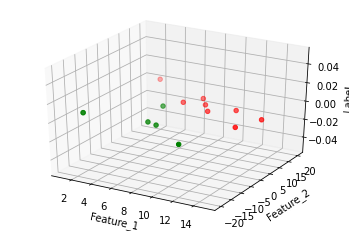

In [4]:
fig = plt.figure()
ax = plt.axes(projection='3d')
###
xline = input_features[:, 0]
yline = input_features[:, 1]
zline = input_features[:, 2]

###
lbl = [1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0]
colors = ['red', 'green']
ax.scatter(xline, yline, c=lbl, cmap=matplotlib.colors.ListedColormap(colors))
ax.set_xlabel('Feature_1')
ax.set_ylabel('Feature_2')
ax.set_zlabel('Label')

In [5]:
weights = tf.Variable([0.0, 0, 0])
learning_rate = tf.constant(0.02, dtype=tf.float32)
threshold = 300

In [6]:
def predict(inputs, weights):
    summation = tf.tensordot(inputs, weights[1:], axes=1) + weights[0]
    if summation > 0:
        output = 1
    else:
        output = -1
    return output

In [11]:
def train(training_inputs, labels):
    for epoch in range(threshold):
        for inputs, label in zip(training_inputs, labels):
            prediction = predict(inputs, weights)
            # new weight value= old weight value - learninbg rate * gradient
            # loss: 1/2 (labels - predictions) ^2
            weights[0].assign(weights[0] + learning_rate * (label - prediction))
            weights[1:].assign(weights[1:] + learning_rate * (label - prediction) * inputs)
        
        if epoch%100 == 0:
            print(f"Finished {epoch} epochs")

    return weights

In [12]:
X = input_features[:, :2]
Y = input_features[:, -1]
train(X, Y)

Finished 0 epochs
Finished 100 epochs
Finished 200 epochs


<tf.Variable 'Variable:0' shape=(3,) dtype=float32, numpy=array([ 1.6399995 , -0.16000028, -0.20000015], dtype=float32)>

In [13]:
np.meshgrid(xline, yline)


[array([[ 8.,  7., 12., 14., 12.,  1., 15.,  7., 10.,  6.,  8.,  2.,  1.,
          9.],
        [ 8.,  7., 12., 14., 12.,  1., 15.,  7., 10.,  6.,  8.,  2.,  1.,
          9.],
        [ 8.,  7., 12., 14., 12.,  1., 15.,  7., 10.,  6.,  8.,  2.,  1.,
          9.],
        [ 8.,  7., 12., 14., 12.,  1., 15.,  7., 10.,  6.,  8.,  2.,  1.,
          9.],
        [ 8.,  7., 12., 14., 12.,  1., 15.,  7., 10.,  6.,  8.,  2.,  1.,
          9.],
        [ 8.,  7., 12., 14., 12.,  1., 15.,  7., 10.,  6.,  8.,  2.,  1.,
          9.],
        [ 8.,  7., 12., 14., 12.,  1., 15.,  7., 10.,  6.,  8.,  2.,  1.,
          9.],
        [ 8.,  7., 12., 14., 12.,  1., 15.,  7., 10.,  6.,  8.,  2.,  1.,
          9.],
        [ 8.,  7., 12., 14., 12.,  1., 15.,  7., 10.,  6.,  8.,  2.,  1.,
          9.],
        [ 8.,  7., 12., 14., 12.,  1., 15.,  7., 10.,  6.,  8.,  2.,  1.,
          9.],
        [ 8.,  7., 12., 14., 12.,  1., 15.,  7., 10.,  6.,  8.,  2.,  1.,
          9.],
        [ 8.,  7., 12

Text(0.5, 0, 'Label')

<Figure size 864x432 with 0 Axes>

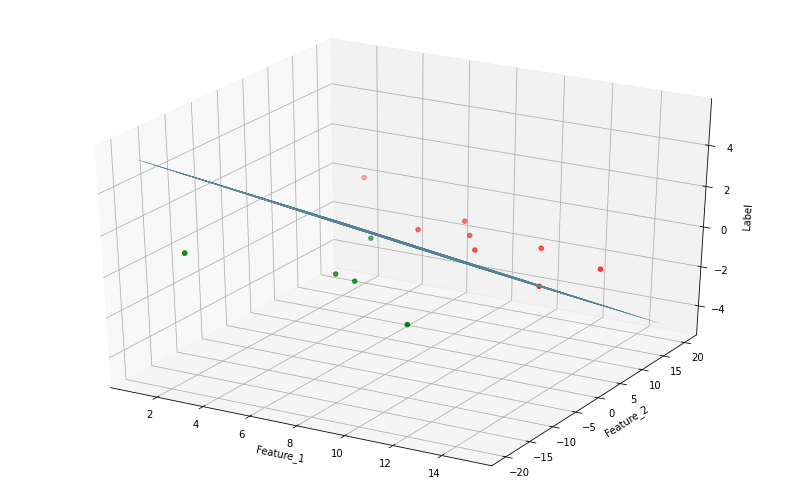

In [18]:
plt.figure(figsize=(12, 6))
xx, yy = np.meshgrid(xline, yline)
z = (weights[0] + weights[1] * xx + weights[2] * yy)
plt3d = plt.figure(figsize=(14, 9)).gca(projection='3d')
plt3d.plot_surface(xx, yy, z, color='skyblue')
plt3d.scatter(xline, yline, c=lbl, cmap=matplotlib.colors.ListedColormap(colors))
plt3d.set_xlabel('Feature_1')
plt3d.set_ylabel('Feature_2')
plt3d.set_zlabel('Label')